<a href="https://colab.research.google.com/github/XxxuLimei/Kaggle/blob/main/Hotel-ID_to_Combat_Human_Trafficking_2022%20-%20FGVC9/GAN_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
!/opt/bin/nvidia-smi

Sun Feb 26 12:40:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   57C    P0    27W /  70W |    327MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
import fnmatch
import random as rn
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import random
import glob
import cv2
import sys

import matplotlib.pyplot as plt
import matplotlib.image as mping

from IPython.display import Image, display
from tensorflow.keras.preprocessing.image import load_img
import PIL
from PIL import ImageOps

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [41]:
# Deep Learning Library
from keras import backend as keras_export
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.compat.v1.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop

# Specifically for CNN
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPool2D, BatchNormalization

In [6]:
from tqdm import notebook
from tqdm.notebook import tqdm as tqdm
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

sns.set_style('darkgrid')

In [7]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.metrics import Recall, AUC
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [27]:
files = glob.glob('/content/train_images/*/*')

In [9]:
import numpy as np

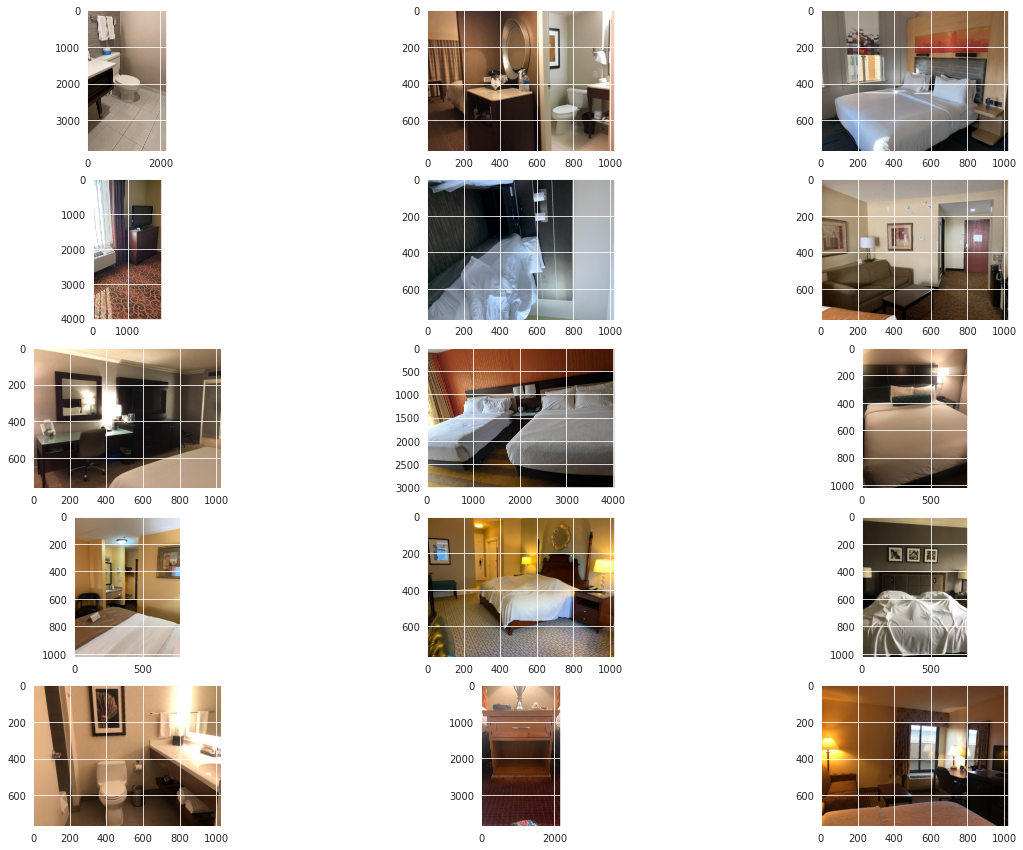

In [28]:
figure, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 15))
for i in range(15):
    path = np.random.choice(files)
    image = cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axes[i//3, i%3].imshow(image)

In [12]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import json
token = {"username":"xxxxx","key":"xxxxx"}
with open('/content/kaggle.json', 'w') as file:
  json.dump(token, file)

In [21]:
!mkdir -p ~/.kaggle

In [22]:
!cp /content/kaggle.json ~/.kaggle/

In [23]:
!chmod 600 ~/.kaggle/kaggle.json

In [24]:
!kaggle config set -n path -v /content

- path is now set to: /content


In [25]:
!kaggle competitions download -c hotel-id-to-combat-human-trafficking-2022-fgvc9

100% 14.0G/14.0G [07:53<00:00, 36.2MB/s]
100% 14.0G/14.0G [07:54<00:00, 31.7MB/s]


In [26]:
!unzip /content/competitions/hotel-id-to-combat-human-trafficking-2022-fgvc9/hotel-id-to-combat-human-trafficking-2022-fgvc9.zip

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: train_images/99234/000021066.jpg  
  inflating: train_images/99234/000021067.jpg  
  inflating: train_images/99234/000021068.jpg  
  inflating: train_images/99234/000021069.jpg  
  inflating: train_images/99234/000021070.jpg  
  inflating: train_images/99234/000021071.jpg  
  inflating: train_images/99234/000021072.jpg  
  inflating: train_images/99311/000020105.jpg  
  inflating: train_images/99311/000020106.jpg  
  inflating: train_images/99311/000020107.jpg  
  inflating: train_images/99311/000020108.jpg  
  inflating: train_images/99311/000020109.jpg  
  inflating: train_images/99311/000020110.jpg  
  inflating: train_images/99311/000020111.jpg  
  inflating: train_images/99311/000020112.jpg  
  inflating: train_images/99311/000020113.jpg  
  inflating: train_images/99311/000020114.jpg  
  inflating: train_images/99311/000020115.jpg  
  inflating: train_images/9940/000001588.jpg  
  inflating: train_images/9940/000001589.jpg  
  inflating: tr

In [29]:
%matplotlib inline
from PIL import Image
from glob import glob

import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras import Model, layers
from keras.callbacks import *
from keras.models import load_model, model_from_json

Random Hotels images in Gray Scale


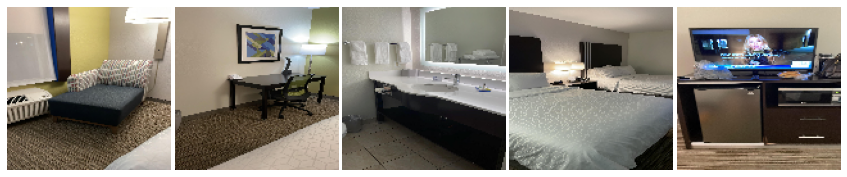

In [30]:
def plotImages(artist,directory):
    print(artist)
    multipleImages = glob(directory)
    plt.rcParams['figure.figsize'] = (15, 15)
    plt.subplots_adjust(wspace=0, hspace=0)
    i_ = 0
    for l in multipleImages[:25]:
        im = cv2.imread(l)
        im = cv2.resize(im, (128, 128)) 
        plt.subplot(5, 5, i_+1) #.set_title(l)
        plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
        i_ += 1
        
        
plotImages("Random Hotels images in Gray Scale","/content/train_images/100055/**")

In [31]:
from tqdm import tqdm
from PIL import Image as Img
from keras import Input
from keras.layers import Dense, Reshape, LeakyReLU, Conv2D, Conv2DTranspose, Flatten, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import RMSprop

In [32]:
PIC_DIR = f'/content/train_images/100297/'

#I changed to 100297 since it has 19 images (100055 has only 5 images)

IMAGES_COUNT = 1125

ORIG_WIDTH = 178
ORIG_HEIGHT = 208
diff = (ORIG_HEIGHT - ORIG_WIDTH) // 2

WIDTH = 128
HEIGHT = 128

crop_rect = (0, diff, ORIG_WIDTH, ORIG_HEIGHT - diff)

images = []
for pic_file in tqdm(os.listdir(PIC_DIR)[:IMAGES_COUNT]):
    pic = Image.open(PIC_DIR + pic_file).crop(crop_rect)
    pic.thumbnail((WIDTH, HEIGHT), Image.ANTIALIAS)
    images.append(np.uint8(pic))

100%|██████████| 19/19 [00:01<00:00, 15.90it/s]


In [33]:
images = np.array(images) / 255
print(images.shape)

(19, 128, 128, 3)


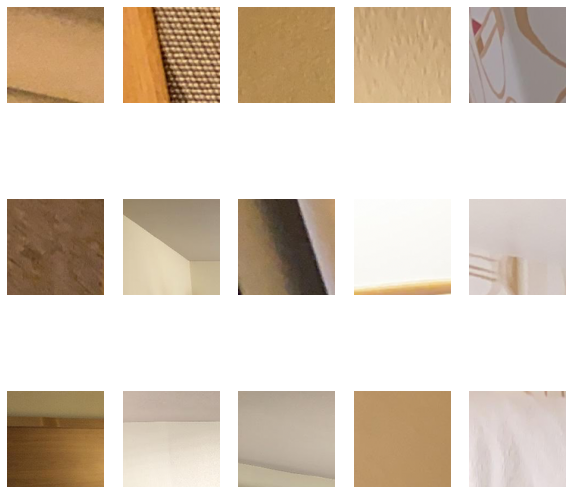

In [34]:
plt.figure(1, figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(images[i])
    plt.axis('off')
plt.show()

In [35]:
LATENT_DIM = 32
CHANNELS = 3

def create_generator():
    gen_input = Input(shape=(LATENT_DIM, ))

    x = Dense(128 * 16 * 16)(gen_input)
    x = LeakyReLU()(x)
    x = Reshape((16, 16, 128))(x)

    x = Conv2D(256, 5, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = LeakyReLU()(x)

    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(512, 5, padding='same')(x)
    x = LeakyReLU()(x)
    x = Conv2D(CHANNELS, 7, activation='tanh', padding='same')(x)

    generator = Model(gen_input, x)
    return generator

In [36]:
def create_discriminator():
    disc_input = Input(shape=(HEIGHT, WIDTH, CHANNELS))

    x = Conv2D(256, 3)(disc_input)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Conv2D(256, 4, strides=2)(x)
    x = LeakyReLU()(x)

    x = Flatten()(x)
    x = Dropout(0.4)(x)

    x = Dense(1, activation='sigmoid')(x)
    discriminator = Model(disc_input, x)

    optimizer = RMSprop(
        lr=.0001,
        clipvalue=1.0,
        decay=1e-8
    )

    discriminator.compile(
        optimizer=optimizer,
        loss='binary_crossentropy'
    )

    return discriminator

In [37]:
from IPython.display import Image
from keras.utils.vis_utils import model_to_dot

In [38]:
generator = create_generator()
generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 32768)             1081344   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32768)             0         
                                                                 
 reshape (Reshape)           (None, 16, 16, 128)       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 32, 32, 256)      104883

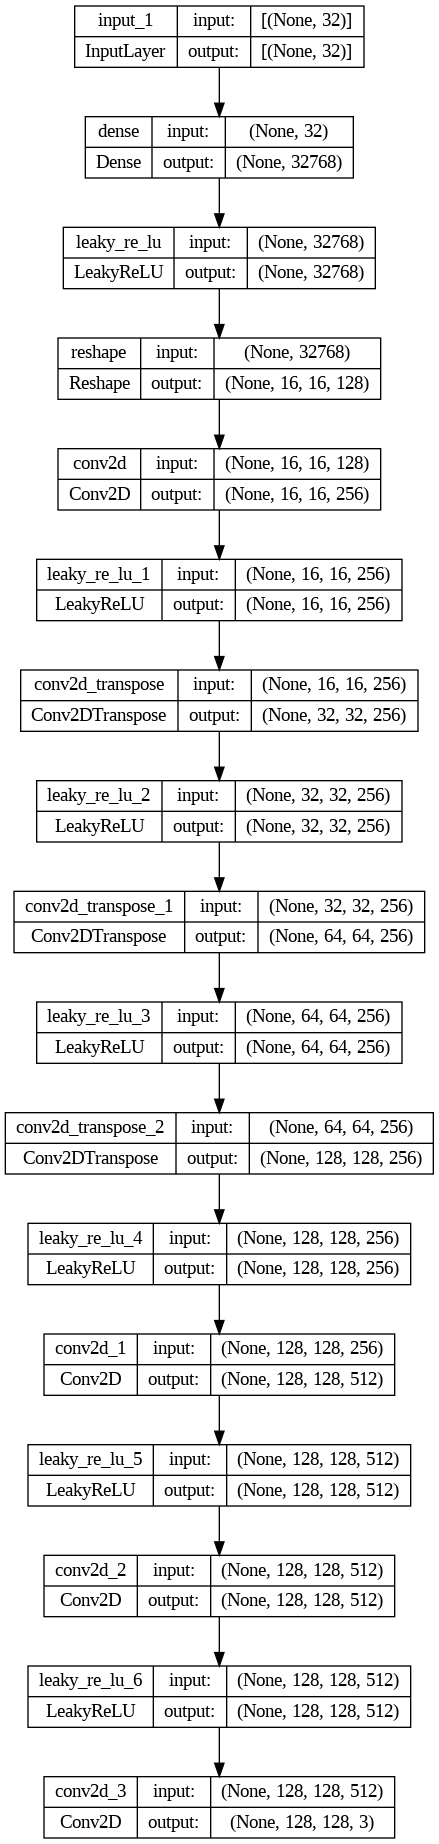

In [39]:
Image(model_to_dot(generator, show_shapes=True).create_png())

In [42]:
discriminator = create_discriminator()
discriminator.trainable = False
discriminator.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d_9 (Conv2D)           (None, 126, 126, 256)     7168      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 126, 126, 256)     0         
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 256)       1048832   
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 62, 62, 256)       0         
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 256)       1048832   
                                                                 
 leaky_re_lu_14 (LeakyReLU)  (None, 30, 30, 256)       0   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


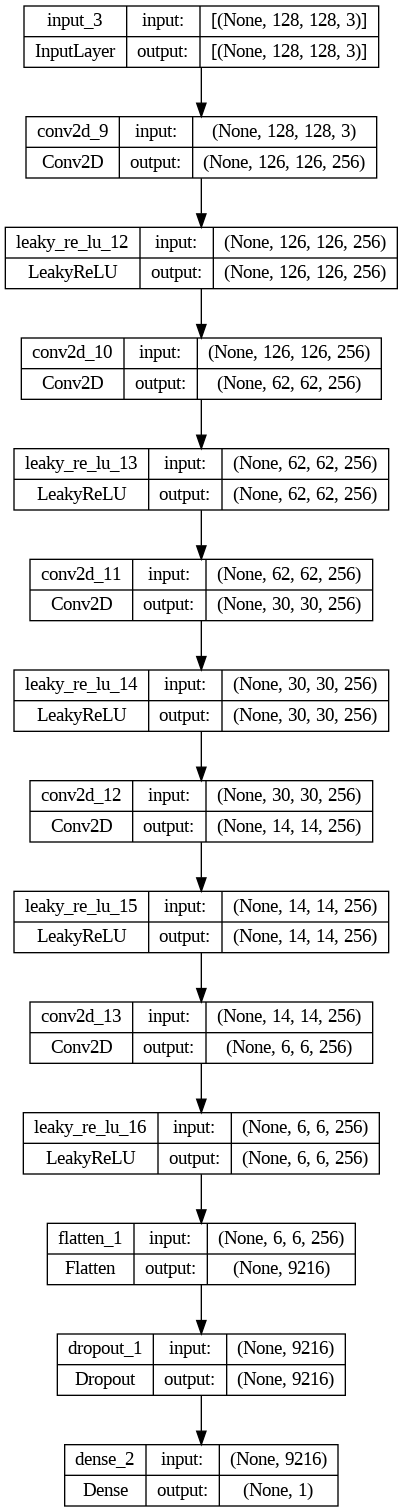

In [43]:
Image(model_to_dot(discriminator, show_shapes=True).create_png())

In [44]:
gan_input = Input(shape=(LATENT_DIM, ))
gan_output = discriminator(generator(gan_input))
gan = Model(gan_input, gan_output)

In [45]:
optimizer = RMSprop(learning_rate=.0001, clipvalue=1.0, decay=1e-8)#The `lr` argument is deprecated, use `learning_rate` instead
gan.compile(optimizer=optimizer, loss='binary_crossentropy')

In [46]:
gan.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 32)]              0         
                                                                 
 model (Functional)          (None, 128, 128, 3)       14953987  
                                                                 
 model_2 (Functional)        (None, 1)                 4211713   
                                                                 
Total params: 19,165,700
Trainable params: 14,953,987
Non-trainable params: 4,211,713
_________________________________________________________________


In [49]:
import time
iters = 15
batch_size = 16

RES_DIR = 'res2'
FILE_PATH = '%s/generated_%d.png'
if not os.path.isdir(RES_DIR):
    os.mkdir(RES_DIR)

CONTROL_SIZE_SQRT = 6
control_vectors = np.random.normal(size=(CONTROL_SIZE_SQRT**2, LATENT_DIM)) / 2

start = 0
d_losses = []
a_losses = []
images_saved = 0
for step in range(iters):
    start_time = time.time()
    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    generated = generator.predict(latent_vectors)

    real = images[start:start + batch_size]
    combined_images = np.concatenate([generated, real])

    labels = np.concatenate([np.ones((batch_size, 1)), np.zeros((batch_size, 1))])
    labels += .05 * np.random.random(labels.shape)

    d_loss = discriminator.train_on_batch(combined_images, labels)
    d_losses.append(d_loss)

    latent_vectors = np.random.normal(size=(batch_size, LATENT_DIM))
    misleading_targets = np.zeros((batch_size, 1))

    a_loss = gan.train_on_batch(latent_vectors, misleading_targets)
    a_losses.append(a_loss)

    start += batch_size
    if start > images.shape[0] - batch_size:
        start = 0

    if step % 14 == 0:
        gan.save_weights('/gan.h5')

        print('%d/%d: d_loss: %.4f,  a_loss: %.4f.  (%.1f sec)' % (step + 1, iters, d_loss, a_loss, time.time() - start_time))

        control_image = np.zeros((WIDTH * CONTROL_SIZE_SQRT, HEIGHT * CONTROL_SIZE_SQRT, CHANNELS))
        control_generated = generator.predict(control_vectors)
        
        for i in range(CONTROL_SIZE_SQRT ** 2):
            x_off = i % CONTROL_SIZE_SQRT
            y_off = i // CONTROL_SIZE_SQRT
            control_image[x_off * WIDTH:(x_off + 1) * WIDTH, y_off * HEIGHT:(y_off + 1) * HEIGHT, :] = control_generated[i, :, :, :]
        im = Img.fromarray(np.uint8(control_image * 255))#.save(StringIO(), 'jpeg')
        im.save(FILE_PATH % (RES_DIR, images_saved))
        images_saved += 1

1/1 [==============================] - 0s 29ms/step
1/15: d_loss: 0.6993,  a_loss: 0.6938.  (2.6 sec)
1/1 [==============================] - 0s 22ms/step
15/15: d_loss: 0.6964,  a_loss: 0.6845.  (2.4 sec)
2/2 [==============================] - 1s 606ms/step


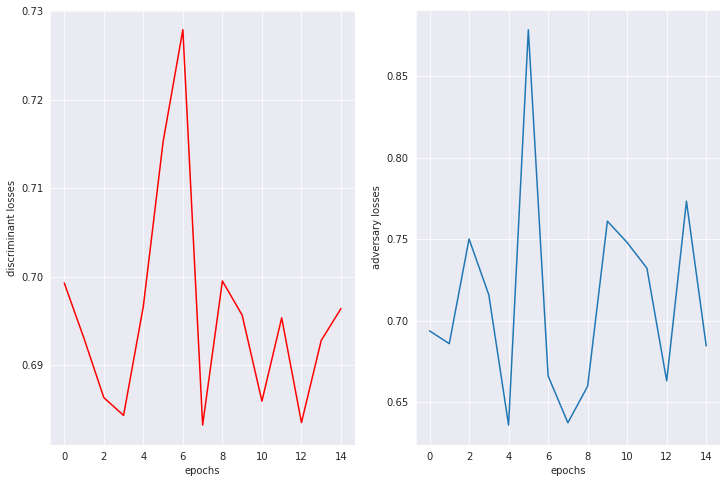

In [50]:
plt.figure(1, figsize=(12, 8))
plt.subplot(121)
plt.plot(d_losses, color='red')
plt.xlabel('epochs')
plt.ylabel('discriminant losses')
plt.subplot(122)
plt.plot(a_losses)
plt.xlabel('epochs')
plt.ylabel('adversary losses')
plt.show()